        시도   구시군 읍면동   구분      선거인수       투표수  후보자별 득표수  Unnamed: 7  \
1    서울특별시   종로구  합계  NaN  129816.0   70657.0   28327.0     40145.0   
57   서울특별시    중구  합계  NaN  112039.0   60323.0   23811.0     34866.0   
107  서울특별시   용산구  합계  NaN  199061.0  104787.0   34614.0     67579.0   
160  서울특별시   성동구  합계  NaN  251990.0  139761.0   51996.0     84320.0   
216  서울특별시   광진구  합계  NaN  305462.0  157005.0   62217.0     90734.0   
266  서울특별시  동대문구  합계  NaN  302024.0  156964.0   63157.0     89470.0   
313  서울특별시   중랑구  합계  NaN  348762.0  177701.0   76660.0     96447.0   
366  서울특별시   성북구  합계  NaN  379123.0  202235.0   85825.0    110962.0   
431  서울특별시   강북구  합계  NaN  268130.0  133390.0   58962.0     70747.0   
475  서울특별시   도봉구  합계  NaN  280913.0  148579.0   61946.0     83072.0   

    Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  후보자별 득표수\n계  무효\n투표수  \
1        1,151        226         167         NaN      70016.0    641.0   
57         696        147         125         NaN      59645.0    67

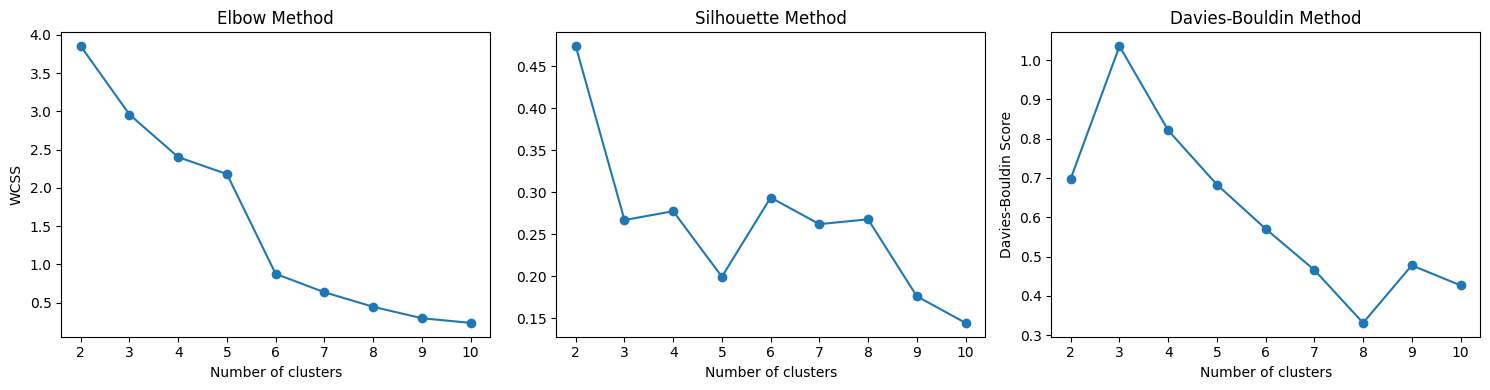

In [6]:
### 선거데이터 로드 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

file_path = "전국동시지방선거.xlsx"
df = pd.read_excel(file_path, sheet_name="Data")
df_filtered = df[df['읍면동'] == '합계'].copy()

#print(df_filtered.head(10))

# 2. 수치형 변환
cols_to_convert = ['선거인수', '투표수', '기권수', '무효\n투표수',
                   '후보자별 득표수', 'Unnamed: 7', '후보자별 득표수\n계']
for col in cols_to_convert:
    df_filtered[col] = df_filtered[col].astype(str).str.replace(',', '').astype(float)

print(df_filtered.head(10))

# 3. 파생변수 생성 및 정규화
cluster_data = df_filtered.groupby('시도').sum(numeric_only=True).reset_index()
cluster_data['투표율'] = cluster_data['투표수'] / cluster_data['선거인수']
cluster_data['기권율'] = cluster_data['기권수'] / cluster_data['선거인수']
cluster_data['무효율'] = cluster_data['무효\n투표수'] / cluster_data['투표수']
cluster_data['민주당비율'] = cluster_data['후보자별 득표수'] / cluster_data['후보자별 득표수\n계']
cluster_data['국힘비율'] = cluster_data['Unnamed: 7'] / cluster_data['후보자별 득표수\n계']
#print(cluster_data.head(10))

features = ['투표율', '기권율', '무효율', '민주당비율', '국힘비율']
X_scaled = MinMaxScaler().fit_transform(cluster_data[features])
#print(X_scaled)

# 군집의 범위 지정 
range_n_clusters = range(2, 11)
wcss = []
silhouette_scores = []
db_scores = []

# 5. 각 지표 계산 루프
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Elbow
    wcss.append(kmeans.inertia_)

    # Silhouette
    silhouette_scores.append(silhouette_score(X_scaled, labels))

    # Davies-Bouldin
    db_scores.append(davies_bouldin_score(X_scaled, labels))


print(wcss)
print(silhouette_scores)
print(db_scores)

## 최적의 K 값을 찾기 
kneedle = KneeLocator(range_n_clusters, wcss, curve="convex", direction="decreasing")
elbow_k = kneedle.elbow
print(f"Elbow Method 최적의 K 값: {elbow_k}")
silhouette_k = silhouette_scores.index(max(silhouette_scores))+2
print(f"최적의 silhouette K 값: {silhouette_k}")
db_k = db_scores.index(min(db_scores))+2
print(f"최적의 davies_bouldin_score K 값: {db_k}")

# 6. 시각화
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')

plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, db_scores, marker='o')
plt.title('Davies-Bouldin Method')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

- 참고자료 : https://colab.research.google.com/drive/1jEvJUlSIgkQq88mITlqWhKJ8c28i6Rsx#scrollTo=EV-5uPmRnyZj

1. 클러스터 분석 
- 클러스터 숫자선정 사유 
- 어떠한 방법론으로 했는지 
- 클러스터별 측정 시나리오 
2. 회귀분석 
- 시나리오는 자유 
- 회귀식의 설명 계수의미와 R2 Pvalue 값을 넣기 

선거에 대한 분석 ( 연도추가 ) : 6/15 일요일까지 